In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
anes = 'anes_preprocessed_data.csv'
anes_df = pd.read_csv(anes, low_memory=False)
anes_df.columns

Index(['state', 'gender', 'race', 'edu', 'income', 'date', 'Yahoo', 'CNN',
       'New York Times', 'Breitbart', 'Fox', 'Washington Post', 'The Guardian',
       'USA Today', 'BBC', 'NPR', 'Buzzfeed', 'vote', 'age_group'],
      dtype='object')

In [3]:
vote_counts = anes_df['vote'].value_counts()
vote_counts

vote
1    3662
2    2843
Name: count, dtype: int64

In [4]:
# Define categorical variables to summarize
categorical_vars = ['gender', 'race', 'age_group', 'edu', 'income', 'state']

# Initialize dictionary to store each summary DataFrame
summary_tables = {}

# Loop through each variable and compute summary
for var in categorical_vars:
    # Cross-tabulate: rows = categories, columns = vote
    ctab = pd.crosstab(anes_df[var], anes_df['vote'])

    # Rename vote columns
    ctab.columns = ['Biden Count', 'Trump Count']

    # Calculate percentages within each vote group
    ctab['% within Biden'] = (ctab['Biden Count'] / ctab['Biden Count'].sum() * 100).round(1).astype(str) + '%'
    ctab['% within Trump'] = (ctab['Trump Count'] / ctab['Trump Count'].sum() * 100).round(1).astype(str) + '%'

    # Reset index so category is a column
    ctab.reset_index(inplace=True)

    # Store result
    summary_tables[var] = ctab

In [7]:
# display gender table
summary_tables['gender']

,gender,Biden Count,Trump Count,% within Biden,% within Trump
0,Female,1554,1410,42.4%,49.6%
1,Male,2092,1428,57.1%,50.2%
2,Sex_Refused,16,5,0.4%,0.2%


In [8]:
summary_tables['race']

,race,Biden Count,Trump Count,% within Biden,% within Trump
0,Asian/PI (Non-Hisp.),145,66,4.0%,2.3%
1,Black (Non-Hisp.),516,39,14.1%,1.4%
2,Hispanic,379,168,10.3%,5.9%
3,Multiple (Non-Hisp.),122,75,3.3%,2.6%
4,Other (Non-Hisp.),62,55,1.7%,1.9%
5,White (Non-Hisp.),2438,2440,66.6%,85.8%


In [9]:
summary_tables['age_group']

,age_group,Biden Count,Trump Count,% within Biden,% within Trump
0,1.0,46,14,1.3%,0.5%
1,2.0,414,220,11.3%,7.7%
2,3.0,609,397,16.6%,14.0%
3,4.0,551,373,15.0%,13.1%
4,5.0,664,627,18.1%,22.1%
5,6.0,728,618,19.9%,21.7%
6,7.0,490,419,13.4%,14.7%
7,8.0,160,175,4.4%,6.2%


In [10]:
summary_tables['edu']

,edu,Biden Count,Trump Count,% within Biden,% within Trump
0,1,122,120,3.3%,4.2%
1,2,440,535,12.0%,18.8%
2,3,664,638,18.1%,22.4%
3,4,217,266,5.9%,9.4%
4,5,243,221,6.6%,7.8%
5,6,1024,685,28.0%,24.1%
6,7,695,291,19.0%,10.2%
7,8,257,87,7.0%,3.1%


In [11]:
summary_tables['income']

,income,Biden Count,Trump Count,% within Biden,% within Trump
0,1,292,208,8.0%,7.3%
1,2,121,79,3.3%,2.8%
2,3,89,59,2.4%,2.1%
3,4,128,101,3.5%,3.6%
4,5,102,101,2.8%,3.6%
5,6,140,117,3.8%,4.1%
6,7,110,83,3.0%,2.9%
7,8,137,105,3.7%,3.7%
8,9,99,79,2.7%,2.8%
9,10,234,200,6.4%,7.0%


In [12]:
summary_tables['state']

,state,Biden Count,Trump Count,% within Biden,% within Trump
0,Alabama,39,57,1.1%,2.0%
1,Alaska,2,6,0.1%,0.2%
2,Arizona,57,69,1.6%,2.4%
3,Arkansas,13,32,0.4%,1.1%
4,California,407,171,11.1%,6.0%
5,Colorado,79,50,2.2%,1.8%
6,Connecticut,40,21,1.1%,0.7%
7,Delaware,10,6,0.3%,0.2%
8,Florida,214,192,5.8%,6.8%
9,Georgia,89,91,2.4%,3.2%


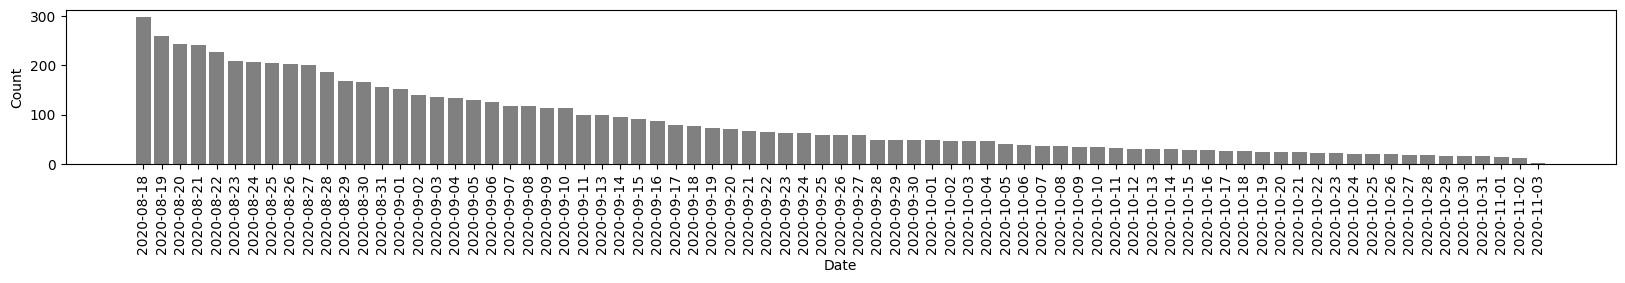

In [13]:
# Daily count of ANES 2020 survey responses during the pre-election period
date_counts = anes_df['date'].value_counts()
date_counts_sorted = date_counts.sort_index()
plt.figure(figsize=(20, 2))
plt.bar(date_counts_sorted.index, date_counts, color='gray')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show() 

In [14]:
news_columns = ['Yahoo', 'CNN', 'New York Times', 'Breitbart', 'Fox','Washington Post', 'The Guardian', 'USA Today', 'BBC', 'NPR', 'Buzzfeed']

# Initialize a list to store results
rows = []

# Loop through each news source
for col in news_columns:
    # Get mention percentages
    counts = anes_df[col].value_counts(normalize=True)
    mentioned_pct = round(counts.get(1, 0) * 100, 2)
    not_mentioned_pct = round(counts.get(0, 0) * 100, 2)

    # Filter for those who mentioned the source
    mentioned_group = anes_df[anes_df[col] == 1]
    mentioned_total = len(mentioned_group)

    biden_in_mentioned = mentioned_group['vote'].eq(1).sum()
    trump_in_mentioned = mentioned_group['vote'].eq(2).sum()

    biden_pct_within = round(biden_in_mentioned / mentioned_total * 100, 2) if mentioned_total > 0 else 0
    trump_pct_within = round(trump_in_mentioned / mentioned_total * 100, 2) if mentioned_total > 0 else 0

    # Calculate share within Biden/Trump total support
    total_biden = anes_df['vote'].eq(1).sum()
    total_trump = anes_df['vote'].eq(2).sum()

    biden_share = round(biden_in_mentioned / total_biden * 100, 2) if total_biden > 0 else 0
    trump_share = round(trump_in_mentioned / total_trump * 100, 2) if total_trump > 0 else 0

    rows.append({
        'Source': col,
        'Mentioned (%)': mentioned_pct,
        'Not Mentioned (%)': not_mentioned_pct,
        'Biden within Mentioned (%)': biden_pct_within,
        'Trump within Mentioned (%)': trump_pct_within,
        'Mentioned Share of Biden Support (%)': biden_share,
        'Mentioned Share of Trump Support (%)': trump_share
    })

# Create a DataFrame to display
percentage_table = pd.DataFrame(rows)
percentage_table

,Source,Mentioned (%),Not Mentioned (%),Biden within Mentioned (%),Trump within Mentioned (%),Mentioned Share of Biden Support (%),Mentioned Share of Trump Support (%)
0,Yahoo,12.01,87.99,59.80,40.20,12.75,11.04
1,CNN,19.35,80.65,82.13,17.87,28.24,7.91
2,New York Times,17.82,82.18,85.85,14.15,27.17,5.77
3,Breitbart,2.46,97.54,10.00,90.00,0.44,5.07
4,Fox,14.13,85.87,24.27,75.73,6.09,24.48
5,Washington Post,14.90,85.10,84.93,15.07,22.47,5.14
6,The Guardian,6.55,93.45,84.27,15.73,9.80,2.36
7,USA Today,9.67,90.33,67.73,32.27,11.63,7.14
8,BBC,10.35,89.65,81.87,18.13,15.05,4.29
9,NPR,11.27,88.73,89.09,10.91,17.83,2.81


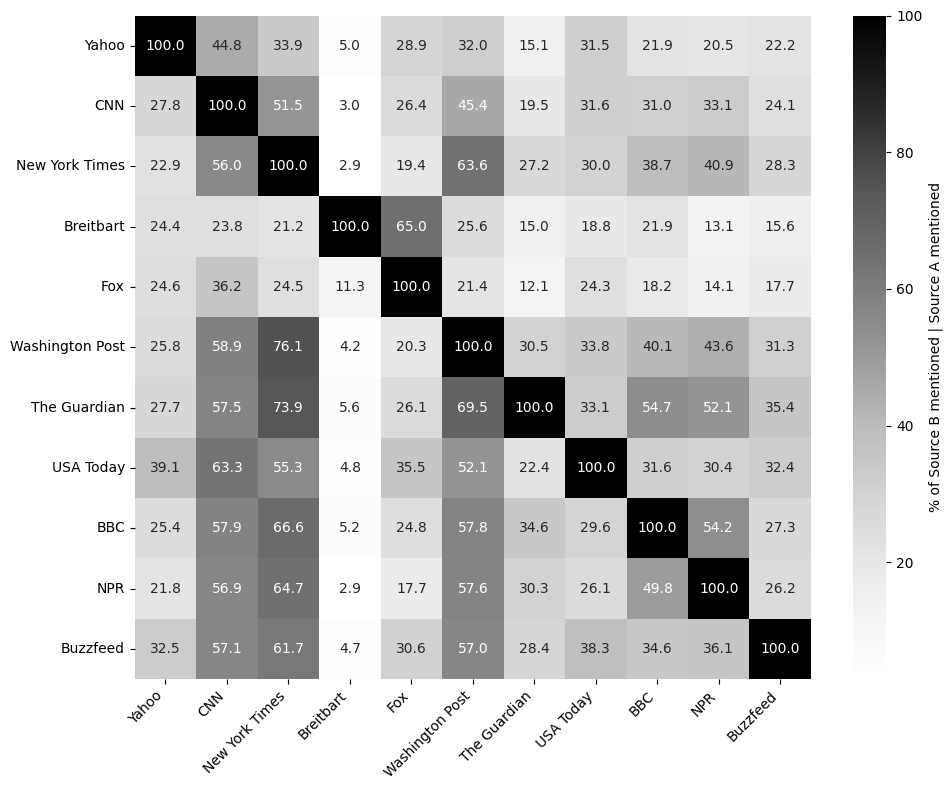

In [15]:
overlap_matrix = pd.DataFrame(index=news_columns, columns=news_columns, dtype=float)

# Calculate P(B = 1 | A = 1)
for source_a in news_columns:
    users_a = anes_df[anes_df[source_a] == 1]
    for source_b in news_columns:
        if len(users_a) == 0:
            overlap = 0.0
        else:
            overlap = users_a[source_b].mean() * 100  # percent
        overlap_matrix.loc[source_a, source_b] = round(overlap, 1)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(overlap_matrix.astype(float), annot=True, fmt=".1f", cmap="Grays", 
            cbar_kws={'label': '% of Source B mentioned | Source A mentioned'})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()